In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import random

# Q1

In [ ]:
def NormalizedHistogram(image):
    pixel_values = np.arange(256)
    count = np.zeros(256)
    n_pixels = 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            count[image[i][j]] += 1
            n_pixels += 1
    count = count/n_pixels
    plt.title("Normalized Histogram")
    plt.plot(count, color='#ef476f')
    plt.bar(pixel_values, count,color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.show()
    return count

In [ ]:
def KL_divergence(p, q):
    kl_divergence = 0
    for i in range(len(p)):
        if(p[i]>0 and q[i]>0):
            kl_divergence += p[i] * math.log2(p[i]/q[i])
        return kl_divergence
    else:
        return "Distribution in the denominator has zero values"

In [ ]:
def EntropyOfDiscreteRV(PMF):
    entropy = 0
    for i in range(len(PMF)):
        prop = PMF[i]
        if prop:
            entropy = entropy + (-prop * math.log2(prop))
    return entropy

H(p, q)=H(p) + D(p||q)

Q1(a)  Function that accept two PMF's and calculate cross entropy brtween them.

In [ ]:
def CrossEntropy(p,q):
    H=EntropyOfDiscreteRV(p)
    D=KL_divergence(p, q)
    return H+D

In [ ]:
p = [0.5, 0.25, 0.125, 0.125]  
q=[0.25,0.25, 0.25, 0.125, 0.125]  

In [ ]:
CrossEntropy(p,q)

2.25

### Q 1(a)(i)  Verify your function using the stereo image normalized histogram pair.

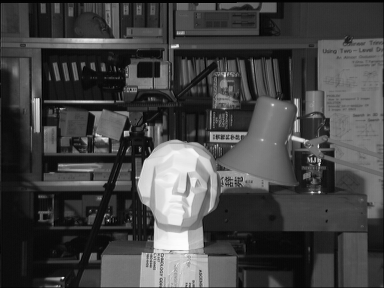

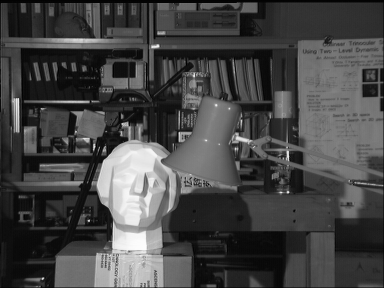

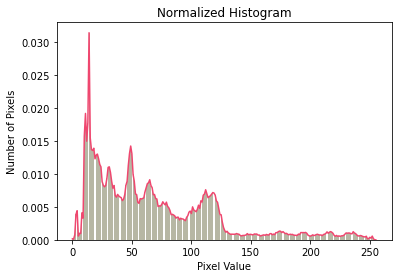

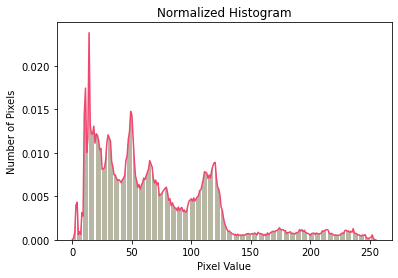

In [ ]:
img1= Image.open('left.png')
img2= Image.open('right.png')
display(img1)
display(img2)
left =NormalizedHistogram(np.asarray(img1))
right= NormalizedHistogram(np.asarray(img2))

In [ ]:
p = left
q = right

In [ ]:
print(CrossEntropy(list(p),list(q)))

7.258490880598341


### Q 1(a)(ii) As with the KL divergence problem, choose a fixed PMF p ∼ Bern(r). Choose another PMF q ∼ Bern(s) where s can be varied. Plot H(p, q) as a function of s.

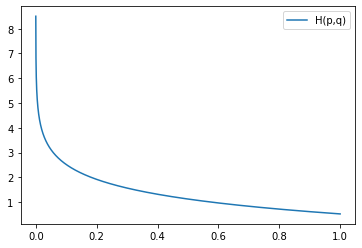

In [ ]:
r = 0.6
p = [r, 1-r]
s = np.linspace(0, 1, 10000)
Cross_Entropy = []
s = s[1:len(s)-1]
for q in s:
    Cross_Entropy.append(CrossEntropy(p,[q, 1-q]) )
    
plt.plot(s, Cross_Entropy, label = 'H(p,q)')
plt.legend()
plt.show()

PMFS matches by minimizing H(p,q)

### 1(b) Verify that the JS(p, q) is symmetric indeed while D(p||q) is not. Again, use the normalized histograms of the stereo image pair.

In [ ]:
p = left
q = right

In [ ]:
def JSDIVERGENCE(p, q):
	m = 0.5 * (p + q)
	return 0.5 * KL_divergence(p, m) + 0.5 * KL_divergence(q, m)

In [ ]:
pq = JSDIVERGENCE(p,q)
qp = JSDIVERGENCE(q,p)

In [ ]:
from math import sqrt

JS(p, q) is symmetric

In [ ]:
print("JS divergence of p and q, J(p,q) =", round(pq,8))
print("JS divergence of q and p, J(q,p) =", round(qp,8))
print("JS distance of p and q, J(p,q) =", sqrt(round(pq,8)))
print("JS distance of q and p, J(q,p) =", sqrt(round(qp,8)))

JS divergence of p and q, J(p,q) = 1.401e-05
JS divergence of q and p, J(q,p) = 1.401e-05
JS distance of p and q, J(p,q) = 0.0037429934544425804
JS distance of q and p, J(q,p) = 0.0037429934544425804


D(p||q) is not symmetric

In [ ]:
D_pq = KL_divergence(p, q)
D_qp = KL_divergence(q, p)

In [ ]:
print("KL divergence between PDF's p and q, J(p,q) =", round(D_pq,8))
print("KL divergence between PDF's q and p, J(q,p) =", round(D_qp,8))

KL divergence between PDF's p and q, J(p,q) = 0.00019678
KL divergence between PDF's q and p, J(q,p) = -8.103e-05


### Wasserstein Distance:

In [ ]:
 def WassersteinDistance(joint_pmf , r , s):
    if(round(np.sum(joint_pmf),2) == 1.0 )and (round(np.sum(r), 2) == 1.0) and (round(np.sum(s),2) == 1.0) :
        p,q = joint_pmf.shape
        Rlen = r.shape[0]
        Slen = s.shape[0]
        r = np.round( r, 5)
        s =np.round(s,5)
        x_marginal = np.round (np.sum(joint_pmf,axis =0),5)
        y_marginal = np.round (np.sum(joint_pmf,axis = 1), 5)
        Xlen = x_marginal.shape[0]
        Ylen = y_marginal.shape[0]
        if (Xlen == Rlen) and (Ylen == Slen) and (np.array_equal(x_marginal,r)) and (np.array_equal(y_marginal,s)):
            return True;
        elif (Xlen == Rlen) and (Ylen == Slen)and (Xlen == Ylen) and (np.array_equal(y_marginal,r)) and (np.array_equal( x_marginal,s)):
            return True
        elif (Ylen == Rlen) and (Xlen == Slen) and (np.array_equal(y_marginal,r)) and (np.array_equal(x_marginal,s)):
            return True
    else :
        print("One among the input pmf's are not valid")
    return False

positive example and a negative example.

In [ ]:

joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
r=[0.5,0.25,0.125,0.125]
s=[0.25,0.25,0.25,0.25]

WassersteinDistance(joint_pmf , np.asarray(r) ,np.asarray(s))

True

In [ ]:
joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
r=[0.45,0.3,0.125,0.125]
s=[0.3,0.20,0.25,0.25]

WassersteinDistance(joint_pmf , np.asarray(r) ,np.asarray(s))

False

### 2. What is the crowding problem?

Crowding problem occurs once we try and represent data which belongs to a high dimensional vector space to a low dimensional space of vectors. It happens when we go from one dimension to other For example,all point a distance of 1 from (0,0) form a circle while all points at a distance of 1 in (0,0,0) form a sphere. If we try to bring 3d sphere to 2d cirle many points will collide and there neighboorhood is not preserved which cause crowding problem

### ii. How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?

In SNE, KL divergence is minimized for the conditional probabilities of a datapoint i picking a datapoint j, in between the upper dimensional space and  lower dimensional space.

We know that KL divergence is minimized when both the probability distributions match. within the case of SNE the distances are mapped to probabilities employing a statistical distribution. to scale back the KL divergence two points having the identical distance within the higher dimensional space should have the identical distance in lower dimensional space also, as only then the chances obtained from the normal distribution for these distances would be same, thus the KL divergence would be minimized because of both of them having same probabilities.

Crowding problem, pairwise equidistant but spatially separated points within the higher dimensions would be having same distances within the lower dimensions but wouldn't have the spatial separation thanks to lesser number of dimensions available. Therefore, all the pairwise equidistant or nearby points within the higher dimension would be mapped at a same distance within the lower dimension space and hence crowding would be observed.

But if heavy tailed distribution like student-t distribution is employed to convert distances into probabilities within the lower dimensions, to cut back KL divergence the probability distributions in both the upper and lower lower dimensions have to be equal but  employing a heavy tailed distribution for the lower dimension space, the pairwise distance between an information point and its neighbours have to be larger to get the identical probability distribution as of a gaussian. Therefore, within the lower dimension the pairwise distance between a degree and its neighbours would be larger and thereby avoid crowding.

### iii. What other important changes have been made in t-SNE relative to SNE?

Student-t distribution, in t-SNE, the KL divergence between the chance distribution within the higher dimensional space and therefore the lower dimensional space is minimized as compared to minimizing the conditional probabilities in SNE.

For speeding up the gradient based learning procedure a way called early compression is employed where L2 norm of the pairwise distance is added to the first loss function to compress the cluster size during the initial few iterations of the training algorithm and is removed later.

One more optimization technique is commonly accustomed speed up the gradient based learning process which  within which all the pairwise joint probabilities are multiplied by some think about the high dimensional space while keeping the probability values same for the lower dimensional space. The result's that the datapoints form tight but widely separated clusters within the map. This creates lots of relatively empty space within the map, which makes it much easier for the clusters to around relative to 1 .

### Question 2b

In [ ]:
m1 = np.random.normal(1, 0.01, size=(10, 10))
m2 = np.random.normal(10, 0.01, size=(10, 10))
X = np.concatenate((m1, m2), axis=0)

print(X.shape)

(20, 10)


In [ ]:
# Convert distance to probabilities in higher dimensions
# Eq 1 in the tSNE paper by Van der Maaten et. al
def propability_in_high_dimension(X):

    variable = 0.01
    p = np.zeros((X.shape[0], X.shape[0]))
    
    for i in range(X.shape[0]):
    
        p[i,i] = 0.0
        for j in range(X.shape[0]):
            if j != i:
                p[i,j] = np.exp(-1* (np.sum((X[i] - X[j])**2)/(2*variable)))
        
        t = (p[i,:] != 0)
        p[i,:] = p[i,:]/np.sum(p[i,t])

    return p

In [ ]:
# Convert distance to probabilities in lower dimension
# Eq 4 in the tSNE paper by Van der Maaten et. al
def propability_in_low_dimension(A):
    B = np.zeros((A.shape[0], A.shape[0]))
    
    for i in range(A.shape[0]):
    
        B[i,i] = 0.0
        for j in range(A.shape[0]):
            if j != i:
                B[i,j] = np.power(1+np.sum((A[i] - A[j])**2), -1)
        
        t = (B[i,:] != 0)
        B[i,:] = B[i,:]/np.sum(B[i,t])

    return B

Y plot before gradient descent



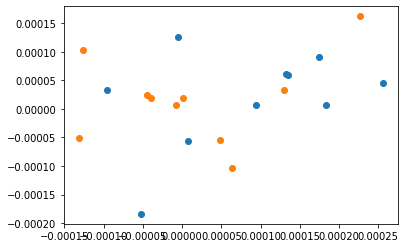

In [ ]:
# Dimension of embedding
N = 2

# No. of epochs
N_E = 50

# Learning rate
L = 0.1

# Momentm
M = 2

prop_i_j= (propability_in_high_dimension(X) + propability_in_high_dimension(X).T)/2*X.shape[0]

# Initialise 20 points with a random vector in 2 dimensions
Y = np.random.normal(0, 10**-4, size=(20, N))

print("Y plot before gradient descent\n")
plt.scatter(Y[:10, 0], Y[:10, 1])
plt.scatter(Y[10:, 0], Y[10:, 1])

KL before starting: {KL(p_i_j, propability_in_low_dimension(Y)) :}
KL after training: {KL(p_i_j, propability_in_low_dimension(Y)) :.4f}

Y plot after gradient descent



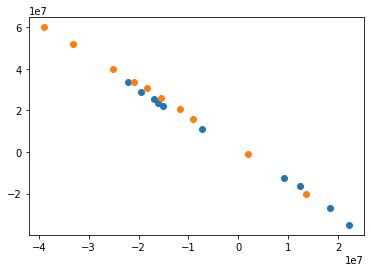

In [ ]:
# Training algorithm

print("KL before starting: {KL(p_i_j, propability_in_low_dimension(Y)) :}")
OldY = np.zeros((2, *Y.shape))
for epochs in range(N_E):
    qij = propability_in_low_dimension(Y)
    for i in range(Y.shape[0]):
        C = 0
        for j in range(Y.shape[0]):
            C += (Y[i] - Y[j]) * (prop_i_j[i, j] - qij[i, j]) * ((1 + np.sum((Y[i] - Y[j])**2))**-1)
        
        Y[i] = -4 * L * C + M * (OldY[1, i, :] - OldY[0, i, :])
        OldY[0, i, :] = OldY[1, i, :]
        OldY[1, i, :] = Y[i]

print("KL after training: {KL(p_i_j, propability_in_low_dimension(Y)) :.4f}\n")
print("Y plot after gradient descent\n")
plt.scatter(Y[:10, 0], Y[:10, 1])
plt.scatter(Y[10:, 0], Y[10:, 1])

### Question 2c)

Text(0.5, 1.0, 'Perplexity: 25')

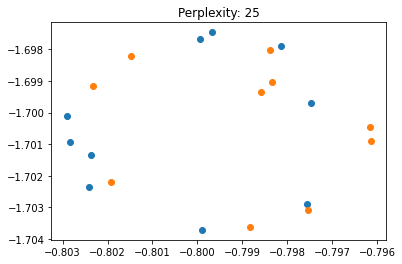

In [ ]:
from sklearn.manifold import TSNE

XEmbedded = TSNE(n_components=2, perplexity=25, learning_rate="auto", init="random").fit_transform(X)

plt.scatter(XEmbedded[:10, 0], XEmbedded[:10, 1])
plt.scatter(XEmbedded[10:, 0], XEmbedded[10:, 1])
plt.title("Perplexity: 25")

Text(0.5, 1.0, 'Perplexity: 30')

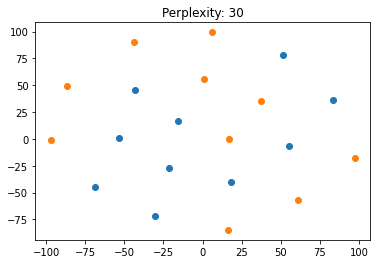

In [ ]:
XEmbedded = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="random").fit_transform(X)

plt.scatter(XEmbedded[:10, 0], XEmbedded[:10, 1])
plt.scatter(XEmbedded[10:, 0], XEmbedded[10:, 1])
plt.title("Perplexity: 30")

Text(0.5, 1.0, 'Perplexity: 35')

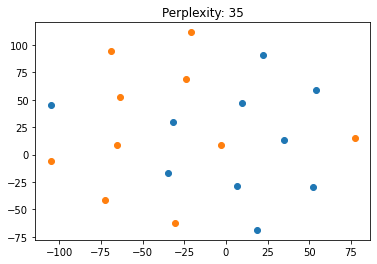

In [ ]:
XEmbedded = TSNE(n_components=2, perplexity=35, learning_rate="auto", init="random").fit_transform(X)

plt.scatter(XEmbedded[:10, 0], XEmbedded[:10, 1])
plt.scatter(XEmbedded[10:, 0], XEmbedded[10:, 1])
plt.title("Perplexity: 35")

Text(0.5, 1.0, 'Perplexity: 40')

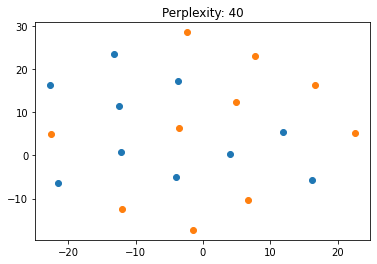

In [ ]:
XEmbedded = TSNE(n_components=2, perplexity=40, learning_rate="auto", init="random").fit_transform(X)

plt.scatter(XEmbedded[:10, 0], XEmbedded[:10, 1])
plt.scatter(XEmbedded[10:, 0], XEmbedded[10:, 1])
plt.title("Perplexity: 40")

Perplexity increases the spacing between the points within the cluster. As the perplexity increases the points become more and more spread out in the cluster.

### 3 Convolution and Correlation

(256, 256, 3)


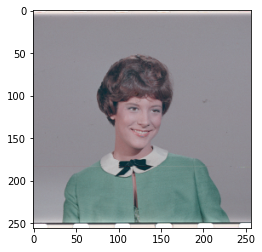

In [ ]:
image = Image.open("4.1.03.tiff").convert("RGB")

image = np.array(image)
plt.imshow(image)
print(image.shape)

In [ ]:
def convolve(image, kernel):
    height, width, channel = image.shape
    hk, wk, ck = kernel.shape

    coh = height + hk - 1
    cow = width + wk - 1

    # calculate reflection
    M = (coh - height)//2
    N = (cow - width)//2

    Image_Holder = np.zeros((coh, cow, channel))
    output = np.zeros((coh, cow))

    # Add reflection
    Image_Holder[ :N, M:-M, :] = np.flipud(image[ :N, :, :])
    Image_Holder[ -N:, M:-M, :] = np.flipud(image[ -N:, :, :])
    Image_Holder[ N:-N, :M, :] = np.fliplr(image[ :, :M, :])
    Image_Holder[ N:-N, -M:, :] = np.fliplr(image[ :, -M:, :])

    Image_Holder[ N:-N, M:-M, :] = image

    
    kernel = np.flip(kernel, axis=(0, 1))

    Image_Holder = Image_Holder/255.0
    kernel = kernel/255.0

    for i in range(width):
        for j in range(height):
            output[i, j] = np.sum(Image_Holder[i:i+wk, j:j+hk, :] * kernel)

    # return output widththout reflection
    return output[ :-2*N, :-2*M]

In [ ]:
def correlate(image, kernel):
    height, weight, channel = image.shape
    hk, wk, ck = kernel.shape

    
    coh = height + hk - 1
    cow = weight + wk - 1

    # calculate reflection
    M = (coh - height)//2
    N = (cow - weight)//2

    PlaceHolderImage = np.zeros((coh, cow, channel))
    output = np.zeros((coh, cow))

    # Add reflection
    PlaceHolderImage[ :N, M:-M, :] = np.flipud(image[ :N, :, :])
    PlaceHolderImage[ -N:, M:-M, :] = np.flipud(image[ -N:, :, :])
    PlaceHolderImage[ N:-N, :M, :] = np.fliplr(image[ :, :M, :])
    PlaceHolderImage[ N:-N, -M:, :] = np.fliplr(image[ :, -M:, :])

    PlaceHolderImage[ N:-N, M:-M, :] = image

    PlaceHolderImage = PlaceHolderImage/255.0
    kernel = kernel/255.0

    for i in range(weight):
        for j in range(height):
            output[i, j] = np.sum(PlaceHolderImage[i:i+wk, j:j+hk, :] * kernel)

    # return output weightthout reflection
    return output[ :-2*N, :-2*M]

(25, 25, 3)


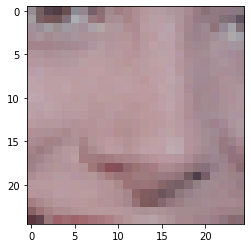

In [ ]:
h, w, c = image.shape
kernel3 = image[ h//2-5:h//2+6, w//2-5:w//2+6,:]

# 5x5 kernel
# Extracted from the centre
kernel5 = image[ h//2-12:h//2+13, w//2-12:w//2+13,:]
plt.imshow(kernel5)
print(kernel5.shape)

Text(0.5, 1.0, '11x11 conv kernel')

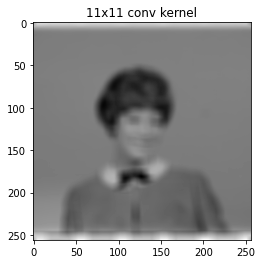

In [ ]:
Output_Conv3 = convolve(image, kernel3)
plt.imshow(Output_Conv3, cmap="gray")
plt.title("11x11 conv kernel")

Text(0.5, 1.0, '25x25 conv kernel')

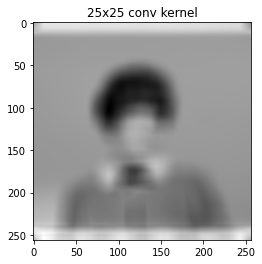

In [ ]:
Output_Conv5 = convolve(image, kernel5)
plt.imshow(Output_Conv5, cmap="gray")
plt.title("25x25 conv kernel")

Text(0.5, 1.0, '11x11 correlation kernel')

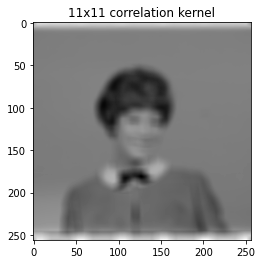

In [ ]:
corr_output3 = correlate(image, kernel3)
plt.imshow(corr_output3, cmap="gray")
plt.title("11x11 correlation kernel")

Text(0.5, 1.0, '25x25 correlation kernel')

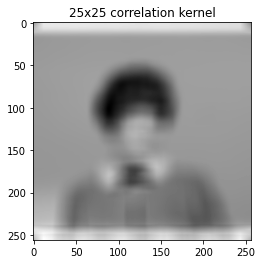

In [ ]:
corr_output5 = correlate(image, kernel5)
plt.imshow(corr_output5, cmap="gray")
plt.title("25x25 correlation kernel")